Useful links:
- https://docs.nvidia.com/nsight-compute/NsightComputeCli/index.html#nvprof-metric-comparison
- https://docs.nvidia.com/cuda/profiler-users-guide/index.html#metrics-reference-7x
- https://canvas.kth.se/courses/36161/assignments/223741
- https://canvas.kth.se/courses/36161/pages/tutorial-timing-your-kernel-cpu-timer-and-nvprof?module_item_id=561394

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sat Jan  7 10:10:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_2'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_2
hw4_ex2_cuda_streams.ipynb		 lab4_ex2
hw4_ex2_profile_134217728.nvprof	 lab4_ex2.cu
hw4_ex2_profile_8388608_segsize_.nvprof


In [ ]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
!./lab4_ex2 131070

The input length is 131070.


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab4_ex2 131070

The input length is 131070.
==PROF== Connected to process 814 (/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_2/lab4_ex2)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 2: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 3: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 4: 0%....50%....100% - 8 passes
==ERROR== The application returned an error code (11).
[814] lab4_ex2@127.0.0.1
  vecAdd(double*, double*, double*, int, int), 2023-Jan-07 10:11:35, Context 1, Stream 13
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.90
    SM Frequency                                                             cycle/usecond                         567.71
    Elapsed Cycles         

In [ ]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
!nvprof ./lab4_ex2 2097152

The input length is 2097152.
==877== NVPROF is profiling process 877, command: ./lab4_ex2 2097152
Time Data copy (H2D + D2H) and CUDA kernel: 0.003543.
CPU and GPU results are equal.
==877== Profiling application: ./lab4_ex2 2097152
==877== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   61.90%  3.0579ms         8  382.24us  356.89us  412.09us  [CUDA memcpy HtoD]
                   32.21%  1.5911ms         4  397.78us  320.41us  432.69us  [CUDA memcpy DtoH]
                    5.89%  291.00us         4  72.750us  68.574us  75.487us  vecAdd(double*, double*, double*, int, int)
      API calls:   95.23%  336.20ms         4  84.049ms  6.5816ms  316.25ms  cudaHostAlloc
                    2.97%  10.477ms         4  2.6193ms  2.4105ms  3.1386ms  cudaFreeHost
                    0.96%  3.3739ms         1  3.3739ms  3.3739ms  3.3739ms  cudaDeviceSynchronize
                    0.49%  1.7173ms         3  572.42us  210.53us 

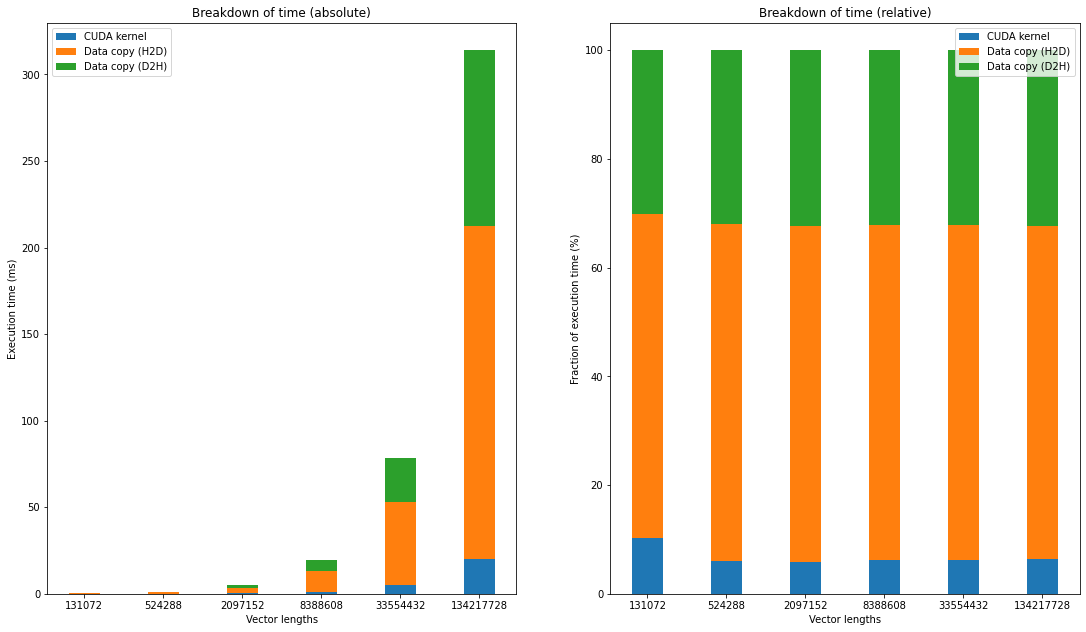

In [ ]:
# Question 1
import matplotlib.pyplot as plt
import numpy as np

vector_lengths = ['131072', '524288', '2097152', '8388608', '33554432', '134217728']
datacpy_h2d_abs = np.array([224.60*10**(-3), 781.75*10**(-3), 3.0231,          12.071, 48.373, 192.85])
datacpy_d2h_abs = np.array([113.21*10**(-3), 391.55*10**(-3), 1.5828,          6.3170, 25.300, 101.28])
cuda_kernel_abs = np.array([38.720*10**(-3), 75.646*10**(-3), 290.81*10**(-3), 1.2167, 4.9207, 19.861])

datacpy_h2d_rel = np.array([59.65, 61.90, 61.74, 61.57, 61.55, 61.42])
datacpy_d2h_rel = np.array([30.07, 32.00, 32.32, 32.22, 32.19, 32.26])
cuda_kernel_rel = np.array([10.28,  6.10,  5.94,  6.21,  6.26,  6.33])

width = 0.4
fig, ax = plt.subplots(1, 2)

ax[0].bar(vector_lengths, cuda_kernel_abs, width, label='CUDA kernel')
ax[0].bar(vector_lengths, datacpy_h2d_abs, width, bottom=cuda_kernel_abs,
       label='Data copy (H2D)')
ax[0].bar(vector_lengths, datacpy_d2h_abs, width, bottom=datacpy_h2d_abs+cuda_kernel_abs,
       label='Data copy (D2H)')

ax[0].set_xlabel('Vector lengths')
ax[0].set_ylabel('Execution time (ms)')
ax[0].set_title('Breakdown of time (absolute)')
ax[0].legend()

ax[1].bar(vector_lengths, cuda_kernel_rel, width, label='CUDA kernel')
ax[1].bar(vector_lengths, datacpy_h2d_rel, width, bottom=cuda_kernel_rel,
       label='Data copy (H2D)')
ax[1].bar(vector_lengths, datacpy_d2h_rel, width, bottom=datacpy_h2d_rel+cuda_kernel_rel,
       label='Data copy (D2H)')

ax[1].set_xlabel('Vector lengths')
ax[1].set_ylabel('Fraction of execution time (%)')
ax[1].set_title('Breakdown of time (relative)')
ax[1].legend()

fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [ ]:
# Question 2
!nvprof --output-profile hw4_ex2_profile_8388608_1stream.nvprof -f ./lab4_ex2 8388608

The input length is 8388608.
==12718== NVPROF is profiling process 12718, command: ./lab4_ex2 8388608
Time Data copy (H2D + D2H) and CUDA kernel: 0.016832.
CPU and GPU results are equal.
==12718== Generated result file: /content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_2/hw4_ex2_profile_8388608_1stream.nvprof


In [ ]:
# Question 3
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
#!printf "set cuda memcheck on\nset cuda api_failures stop\ncatch throw\nr\nbt\ninfo locals\nthread 1\nbt\n" > ./tmp.txt
#!cuda-gdb -batch -x tmp.txt --args ./lab4_ex2 50
#!./lab4_ex2 1000
!nvprof ./lab4_ex2 8388608

The input length is 8388608.
==30929== NVPROF is profiling process 30929, command: ./lab4_ex2 8388608
Time Data copy (H2D + D2H) and CUDA kernel: 0.013071.
CPU and GPU results are equal.
==30929== Profiling application: ./lab4_ex2 8388608
==30929== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   59.20%  12.361ms        18  686.71us  273.43us  784.78us  [CUDA memcpy HtoD]
                   31.49%  6.5737ms         9  730.41us  237.37us  821.74us  [CUDA memcpy DtoH]
                    9.31%  1.9443ms         9  216.03us  173.31us  224.03us  vecAdd(double*, double*, double*, int, int)
      API calls:   87.90%  414.69ms         4  103.67ms  25.820ms  334.70ms  cudaHostAlloc
                    8.54%  40.265ms         4  10.066ms  9.5621ms  11.399ms  cudaFreeHost
                    2.72%  12.815ms         1  12.815ms  12.815ms  12.815ms  cudaDeviceSynchronize
                    0.52%  2.4529ms         3  817.64us  2

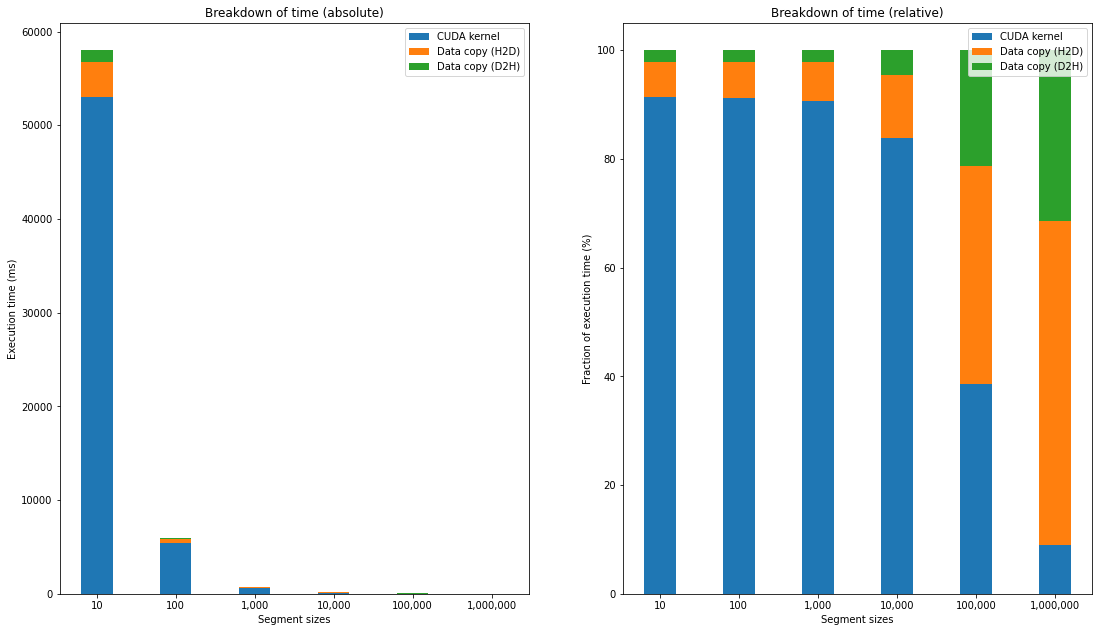

In [2]:
# Question 3
import matplotlib.pyplot as plt
import numpy as np

segment_sizes = ['10', '100', '1,000', '10,000', '100,000', '1,000,000']
datacpy_d2h_abs = np.array([1.21222*10**(3),          126.25, 16.080, 6.9546, 7.2589, 6.8279])
datacpy_h2d_abs = np.array([3.82977*10**(3),          399.29, 52.769, 17.569, 13.682, 12.952])
cuda_kernel_abs = np.array([52.9683*10**(3), 5.43207*10**(3), 670.95, 127.43, 13.120, 1.9356])

datacpy_d2h_rel = np.array([ 2.09,  2.12,  2.17,  4.58, 21.31, 31.44])
datacpy_h2d_rel = np.array([ 6.60,  6.70,  7.13, 11.56, 40.17, 59.64])
cuda_kernel_rel = np.array([91.31, 91.18, 90.69, 83.86, 38.52,  8.91])

width = 0.4
fig, ax = plt.subplots(1, 2)

ax[0].bar(segment_sizes, cuda_kernel_abs, width, label='CUDA kernel')
ax[0].bar(segment_sizes, datacpy_h2d_abs, width, bottom=cuda_kernel_abs,
       label='Data copy (H2D)')
ax[0].bar(segment_sizes, datacpy_d2h_abs, width, bottom=datacpy_h2d_abs+cuda_kernel_abs,
       label='Data copy (D2H)')

ax[0].set_xlabel('Segment sizes')
ax[0].set_ylabel('Execution time (ms)')
ax[0].set_title('Breakdown of time (absolute)')
ax[0].legend()

ax[1].bar(segment_sizes, cuda_kernel_rel, width, label='CUDA kernel')
ax[1].bar(segment_sizes, datacpy_h2d_rel, width, bottom=cuda_kernel_rel,
       label='Data copy (H2D)')
ax[1].bar(segment_sizes, datacpy_d2h_rel, width, bottom=datacpy_h2d_rel+cuda_kernel_rel,
       label='Data copy (D2H)')

ax[1].set_xlabel('Segment sizes')
ax[1].set_ylabel('Fraction of execution time (%)')
ax[1].set_title('Breakdown of time (relative)')
ax[1].legend()

fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()